In [3]:
import pennylane as qml
from scipy.linalg import expm
import numpy as np

H = 0.2 * qml.PauliX(0) @ qml.PauliZ(1) + 0.3* qml.PauliX(0) - 2.6 * qml.PauliY(1) - 0.3 * qml.PauliX(1)


def phi():
  qml.Hadamard(wires = 0)
  qml.CRY(0.3, wires = [0,1])

dev1 = qml.device("default.qubit", wires = H.wires)

@qml.qnode(dev1)
def circuit1():
  phi()
  return qml.expval(H)

# <phi | H | phi>

circuit1()

tensor(0.45005751, requires_grad=True)

In [10]:
estimation_wires = [2,3,4,5,6,7,8]

sum_coeffs = sum([abs(c) for c in H.coeffs])
H_norm = qml.Hamiltonian(np.concatenate([H.coeffs / (2 * sum_coeffs), np.array([0.5])]), H.ops + [qml.Identity(0)])
exp_H = expm(2 * np.pi * 1j * qml.matrix(H_norm))

dev2 = qml.device("default.qubit", wires = H.wires + estimation_wires)

@qml.qnode(dev2)
def circuit2():

  phi()
  qml.QuantumPhaseEstimation(exp_H, estimation_wires = estimation_wires, target_wires = [0,1])
  return qml.probs(wires = estimation_wires)

def energy(output):
  return 2 * sum_coeffs * (sum([output[i] * i / 2 ** len(estimation_wires) for i in range(2 ** len(estimation_wires))]) - 0.5)

output = circuit2()
energy(output)

0.44977244757812435

<BarContainer object of 128 artists>

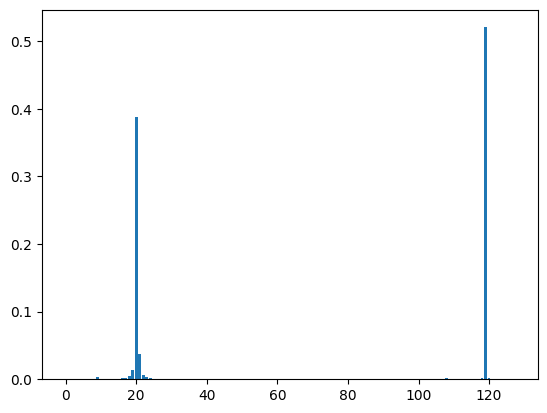

In [11]:
import matplotlib.pyplot as plt

output = circuit2()
plt.bar(range(len(output)), output)